In [96]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [99]:
data = pd.read_csv("D:/AP/Data/CrossSell/Ins_train.csv")

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [101]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Data Exploration observations 
    1. Entries(rows) : 381109 , cols : input = 10, target = 1 
    2. No missing values
    3. Gender, Vehicle_Age and Vehicle_Damage are categorial variables -- Encoding 
    4. Response is Binay -- Binary classification 

In [6]:
data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [7]:
data.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [23]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [24]:
46710/(46710+334399)

0.12256336113815208

In [102]:
replaceStruct = {
                "Vehicle_Age":     {"< 1 Year": 1, "1-2 Year": 2 ,"> 2 Years": 3},
                "Gender":     {"Female": 0, "Male": 1 },
                "Vehicle_Damage":     {"No": 0, "Yes": 1 } 
                    }

In [103]:
data = data.replace(replaceStruct)

In [10]:
y = data['Response']
X = data[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [19]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [63]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 9,max_features = 5,  min_samples_split = 50, class_weight ="balanced"  )

In [51]:
rf_cv_score = cross_val_score(rf, x_train, y_train, cv = folds, verbose = 1, n_jobs=-1, )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [52]:
print(rf_cv_score)
print("Mean accuracy:", np.mean(rf_cv_score))
print("Standard deviation", np.std(rf_cv_score))

[0.70010496 0.6963167  0.69683651 0.69604933 0.69703331]
Mean accuracy: 0.6972681620228601
Standard deviation 0.0014614855857086062


In [64]:
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=5,
                       min_samples_split=50)

In [58]:
pred = rf.predict(x_test)

In [59]:
confusion_matrix(y_test, pred)

array([[44401, 22496],
       [  653,  8672]], dtype=int64)

In [60]:
accuracy_score(y_test, pred)

0.6962950329301252

## Feature Engineering 

In [105]:

data["Annual_Premium"] = np.where(data["Annual_Premium"] >100000, 100000.0,data['Annual_Premium'])

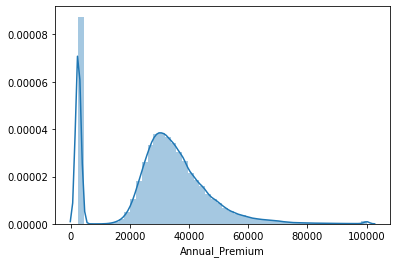

In [106]:
sns.distplot(data.Annual_Premium)

In [107]:
from sklearn.preprocessing import LabelEncoder

cat_feat = ['Region_Code', 'Policy_Sales_Channel' ]
lb = LabelEncoder()
for column in cat_feat:
    data[column] = data[column].astype('str')
    data[column] = lb.fit_transform(data[column])

    

In [108]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
num_feat = ['Age','Annual_Premium','Vintage' ]

for column in num_feat:
    data[[column]] = sc.fit_transform(data[[column]])

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  float64
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  int32  
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  int32  
 10  Vintage               381109 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(2), int64(7)
memory usage: 32.0 MB


In [111]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [112]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0.369231,1,21,0,3,1,0.388456,78,0.716263,1
1,2,1,0.861538,1,23,0,2,0,0.317408,78,0.598616,0
2,3,1,0.415385,1,21,0,3,1,0.366273,78,0.058824,1
3,4,1,0.015385,1,3,1,1,0,0.266910,57,0.667820,0
4,5,0,0.138462,1,36,1,1,0,0.255376,57,0.100346,0


In [113]:
y = data['Response']
X = data[['Gender', 'Age', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]

In [114]:
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [126]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 8,max_features = 4,  min_samples_split = 50, class_weight ="balanced"  )

In [127]:
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=4,
                       min_samples_split=50)

In [128]:
pred = rf.predict(x_test)

In [129]:
confusion_matrix(y_test, pred)

array([[43771, 23126],
       [  564,  8761]], dtype=int64)

In [131]:
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(y_test, pred))
print("Precision:",precision_score(y_test, pred))
print("Recall:",recall_score(y_test, pred))
print('F1-Score:',f1_score(y_test, pred))

Accuracy: 0.6891973445986723
Precision: 0.2747514661147176
Recall: 0.9395174262734585
F1-Score: 0.4251674269630205


## Grid Search 

In [25]:
param_dist = {"max_depth": [5,7,9],
              "min_samples_split": [10,20,30],
              "n_estimators": [100,200,400]
             }
grid_search = GridSearchCV(rf, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc", verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 23.0min finished


RandomForestClassifier(max_depth=9, min_samples_split=30, n_estimators=200)

In [28]:
grid_search.cv_results_

{'mean_fit_time': array([ 26.64355259,  54.19248238, 108.82778144,  27.40730906,
         53.10658541, 106.30412884,  26.96170139,  52.76110873,
        105.68159394,  34.84741373,  68.97925892, 136.66704516,
         34.29887981,  66.63181858, 133.0246738 ,  33.98711286,
         66.90588446, 132.5714859 ,  41.15095654,  80.47280555,
        164.12809992,  41.90334439,  82.29154215, 164.85874672,
         41.51557994,  80.60844383, 125.81676149]),
 'std_fit_time': array([0.75006476, 0.60721819, 3.89067522, 0.9721634 , 0.85563523,
        0.91282975, 0.34792237, 0.42854924, 1.15996189, 0.61835657,
        1.03544242, 1.30636993, 0.83659729, 0.45149995, 1.87695062,
        0.52946985, 0.93828222, 1.33214149, 0.3452865 , 1.10440513,
        1.80048877, 0.89897535, 1.22362923, 1.67574558, 0.73564398,
        1.95518001, 5.63163219]),
 'mean_score_time': array([0.66242862, 1.34021707, 2.58349142, 0.65903878, 1.2951376 ,
        2.56952848, 0.70730848, 1.29792962, 2.5523736 , 0.7723351 ,
  

In [26]:
pred = grid_search.predict(x_test)

In [27]:
rf_score  = accuracy_score(y_test, pred)
print("Accuracy on test Grid Search :", rf_score)

Accuracy on test Grid Search : 0.8776599931778227


In [29]:
confusion_matrix(y_test, pred)

array([[66897,     0],
       [ 9325,     0]], dtype=int64)